# Read and Visualize AW3D30 DEM

- Over the complex Kenyan terrain

- The DEM was produced by JAXA but can be easily accessed here 

https://opentopography.org/

# Import packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import cartopy

In [4]:
from osgeo import gdal

In [5]:
import os

# Working Directory

In [6]:
#os.getcwd()

## Data

In [7]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/DEM_AW3D30/rasters_AW3D30/'
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/DEM_AW3D30/rasters_AW3D30/'

In [8]:
os.listdir(dir_data)

['output_AW3D30.tif']

## List files

In [9]:
lst_DEM = [fl for fl in os.listdir(dir_data) if fl.endswith('.tif') ]
lst_DEM

['output_AW3D30.tif']

In [10]:
os.path.join(dir_data, lst_DEM[0] )

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/DEM_AW3D30/rasters_AW3D30/output_AW3D30.tif'

# Read the data

In [11]:
ds_DEM = gdal.Open(  os.path.join(dir_data, lst_DEM[0] ) )

/home/donald/anaconda3/envs/geospatial/lib/python3.11/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [12]:
# was the projection read successfully, if it exists
ds_DEM.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [13]:
# was the geotransform read successfully, if it exists
ds_DEM.GetGeoTransform()

(34.900000000030246,
 0.0002777777777778173,
 0.0,
 2.199999999988364,
 0.0,
 -0.0002777777777778173)

Geotransform values mean:


    [0] : top left x
    [1] : w-e pixel resolution
    [2] : rotation, 0 if image is "north up"
    [3] : top left y
    [4] : rotation, 0 if image is "north up"
    [5] : n-s pixel resolution

In [14]:
ds_DEM.RasterCount # how many bands

1

In [15]:
ds_DEM.RasterXSize

15480

In [16]:
ds_DEM.RasterYSize

20520

## Read the data

In [17]:
arr_DEM = ds_DEM.ReadAsArray()

In [18]:
arr_DEM.shape

(20520, 15480)

In [19]:
arr_DEM

array([[1428, 1428, 1428, ...,  362,  362,  361],
       [1427, 1427, 1427, ...,  362,  362,  361],
       [1426, 1427, 1426, ...,  361,  362,  362],
       ...,
       [1785, 1786, 1788, ...,  309,  309,  310],
       [1784, 1786, 1787, ...,  310,  311,  311],
       [1784, 1786, 1787, ...,  310,  311,  312]], dtype=int16)

In [20]:
arr_DEM.min()

117

## Quick plot using matplotlib

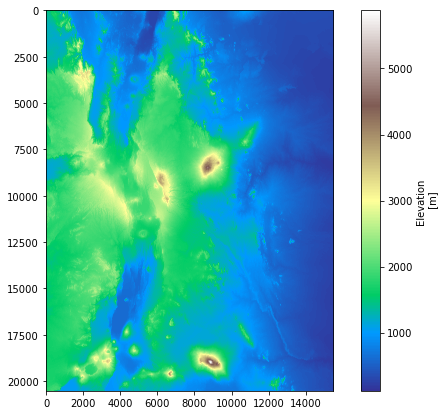

In [21]:
plt.figure(figsize=(10,7))
## add data
plt.imshow(arr_DEM, cmap= plt.get_cmap('terrain') )
## add colobar
plt.colorbar(label='Elevation \n [m]')
plt.show()

## Plot using cartopy

In [22]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [23]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [24]:
ds_DEM.GetGeoTransform() #GDAL defines the top right corner coordinates

(34.900000000030246,
 0.0002777777777778173,
 0.0,
 2.199999999988364,
 0.0,
 -0.0002777777777778173)

In [25]:
arr_DEM.shape

(20520, 15480)

In [26]:
geotransf = ds_DEM.GetGeoTransform()
geotransf

(34.900000000030246,
 0.0002777777777778173,
 0.0,
 2.199999999988364,
 0.0,
 -0.0002777777777778173)

In [27]:
geotransf[0] + (geotransf[1]*15480)

39.200000000030855

In [28]:
geotransf[3] + (geotransf[-1]*20520)

-3.500000000012447

In [29]:
## extent=[longitude_top_left,longitude_top_right,latitude_bottom_left,latitude_top_left]
img_extent = [34.9, 39.2, -3.5, 2.199 ]

now plot

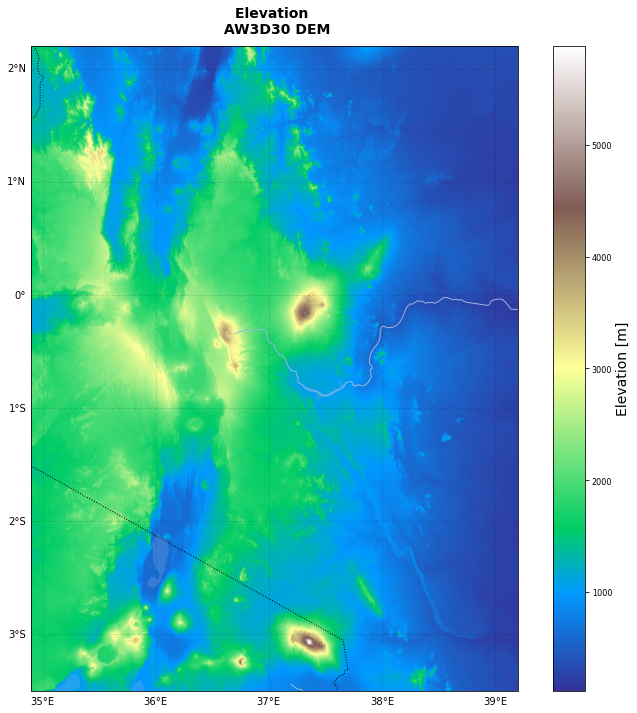

In [32]:
fig, ax = plt.subplots( subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(10,10))

# extent=[longitude_top_left,longitude_top_right,latitude_bottom_left,latitude_top_left]
ax.set_extent(img_extent,  crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.25)
ax.add_feature(cfeature.RIVERS)
#add data
map_ch = ax.imshow(arr_DEM, cmap= plt.get_cmap('terrain'), origin='upper', 
                   extent=img_extent, transform=ccrs.PlateCarree())
### add colorbar
#clbar=plt.colorbar()
clbar =fig.colorbar(map_ch, orientation="vertical" )#label='Precipitation \n [mm/month]',
clbar.ax.tick_params(labelsize=8) 
clbar.set_label(label='Elevation [m]', fontsize=14)
##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

## add title
ax.set_title('Elevation \n AW3D30 DEM', fontsize=14, y=1.01, weight='bold')

## show
plt.tight_layout()

plt.show()

# Plot DEM with an inset

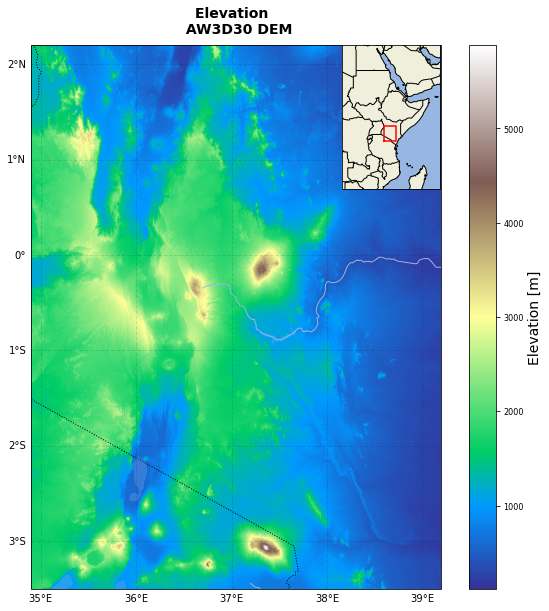

In [34]:
fig, ax = plt.subplots( subplot_kw=dict(projection=ccrs.PlateCarree()), figsize=(10,10))
# extent=[longitude_top_left,longitude_top_right,latitude_bottom_left,latitude_top_left]
ax.set_extent(img_extent,  crs=ccrs.PlateCarree())
## add features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.25)
ax.add_feature(cfeature.RIVERS)
#add data
map_ch = ax.imshow(arr_DEM, cmap= plt.get_cmap('terrain'), origin='upper', 
                   extent=img_extent, transform=ccrs.PlateCarree())
### add colorbar
#clbar=plt.colorbar()
clbar =fig.colorbar(map_ch, orientation="vertical" )#label='Precipitation \n [mm/month]',
clbar.ax.tick_params(labelsize=8) 
clbar.set_label(label='Elevation [m]', fontsize=14)
##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

## add title
ax.set_title('Elevation  \n AW3D30 DEM', fontsize=14, y=1.01, weight='bold')

##############
## add inset
#(left, bottom, width, height)
inset_ax = plt.axes( [0.57, 0.68, 0.21, 0.2], projection=ccrs.PlateCarree() )
## define extent of inset
inset_ax.set_extent([20, 55, -20, 30 ] )  # you want this extent bit bigger than your raster extent
#(x,y) coord of the region mapped
x_coord = [34.9, 34.9, 39.2, 39.2, 34.9] #Bot-left,Top-Left,Top-Right,Bot-Right,Bot-left
y_coord = [-3.5, 2.199, 2.199, -3.5, -3.5] #Bot-left,Top-Left,Top-Right,Bot-Right,Bot-left
#add features for better context
inset_ax.add_feature(cfeature.BORDERS)
inset_ax.add_feature(cfeature.LAND)
inset_ax.add_feature(cfeature.OCEAN)
inset_ax.add_feature(cfeature.COASTLINE)
#add a red box indicating the location
inset_ax.plot(x_coord, y_coord, transform=ccrs.PlateCarree(), zorder=10, color="red")

##### show


plt.show()